In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\Samiksha\Downloads\predictive_maintenance.csv")

In [3]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [4]:
data.shape

(10000, 10)

In [5]:
data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [6]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [7]:
data.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [8]:
data=data.drop(["Product ID"],axis=1)

In [9]:
data=data.drop(["UDI"],axis=1)

In [10]:
data.shape

(10000, 8)

In [11]:
#rename
data=data.rename(columns={"Air temperature [K]":"Air_temperature"})
data=data.rename(columns={"Process temperature [K]":"Process_temperature"})
data=data.rename(columns={"Rotational speed [rpm]":"Rotational_speed"})
data=data.rename(columns={"Torque [Nm]":"Torque"})
data=data.rename(columns={"Tool wear [min]":"Tool_wear"})
data=data.rename(columns={"Failure Type":"Failure_Type"})

In [12]:
data.columns

Index(['Type', 'Air_temperature', 'Process_temperature', 'Rotational_speed',
       'Torque', 'Tool_wear', 'Target', 'Failure_Type'],
      dtype='object')

In [13]:
#target
data.Target.value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

# DatatypeConversion

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
data.Type=le.fit_transform(data.Type)

In [16]:
data.Failure_Type=le.fit_transform(data.Failure_Type)

In [17]:
data.dtypes

Type                     int32
Air_temperature        float64
Process_temperature    float64
Rotational_speed         int64
Torque                 float64
Tool_wear                int64
Target                   int64
Failure_Type             int32
dtype: object

In [18]:

data.shape

(10000, 8)

In [19]:
data.head(1)

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target,Failure_Type
0,2,298.1,308.6,1551,42.8,0,0,1


In [20]:
Target=data["Target"]

In [21]:
data=data.drop(["Target"],axis=1)

In [22]:
data.head(1)

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Failure_Type
0,2,298.1,308.6,1551,42.8,0,1


In [23]:
data["Target"]=Target

In [24]:
data.head(1)

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Failure_Type,Target
0,2,298.1,308.6,1551,42.8,0,1,0


# Model Building

In [25]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [26]:
x.head(1)

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Failure_Type
0,2,298.1,308.6,1551,42.8,0,1


In [27]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=100)

In [30]:
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((8000, 7), (2000, 7), (8000,), (2000,))

# Logistic Regression

In [31]:
#log
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [32]:
lg.fit(x_tr,y_tr)

LogisticRegression()

In [33]:
lg_p=lg.predict(x_te)
lg_p

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [34]:
pred_prob=lg.predict_proba(x_te)
pred_prob

array([[9.97924771e-01, 2.07522889e-03],
       [9.99460246e-01, 5.39754431e-04],
       [8.06801626e-03, 9.91931984e-01],
       ...,
       [9.98715119e-01, 1.28488059e-03],
       [9.94442827e-01, 5.55717279e-03],
       [9.36459431e-01, 6.35405691e-02]])

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
lg_m=confusion_matrix(lg_p,y_te)
lg_m

array([[1930,   35],
       [   1,   34]], dtype=int64)

In [37]:
lg_acc=lg_m.diagonal().sum()/lg_m.sum()*100
lg_acc

98.2

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(lg_p,y_te))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1965
           1       0.49      0.97      0.65        35

    accuracy                           0.98      2000
   macro avg       0.75      0.98      0.82      2000
weighted avg       0.99      0.98      0.98      2000



In [40]:
#AUC-ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [41]:
roc=roc_auc_score(lg_p,y_te)
roc

0.976808433296983

In [42]:
df=pd.DataFrame(pred_prob)
df

,0,1
0,0.997925,0.002075
1,0.999460,0.000540
2,0.008068,0.991932
3,0.994010,0.005990
4,0.995435,0.004565
...,...,...
1995,0.971296,0.028704
1996,0.999300,0.000700
1997,0.998715,0.001285
1998,0.994443,0.005557


In [43]:
fpr,tpr,thrshold=roc_curve(y_te,df.iloc[:,1])

In [44]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.17866390e-04,
       5.17866390e-04, 1.55359917e-03, 1.55359917e-03, 2.07146556e-03,
       2.07146556e-03, 3.62506473e-03, 3.62506473e-03, 9.32159503e-03,
       9.32159503e-03, 1.39823925e-02, 1.39823925e-02, 1.76074573e-02,
       1.76074573e-02, 1.96789228e-02, 1.96789228e-02, 2.58933195e-02,
       2.58933195e-02, 2.79647851e-02, 2.79647851e-02, 3.10719834e-02,
       3.10719834e-02, 3.31434490e-02, 3.31434490e-02, 6.11082341e-02,
       6.11082341e-02, 6.26618332e-02, 6.26618332e-02, 6.36975660e-02,
       6.36975660e-02, 7.35370274e-02, 7.35370274e-02, 7.61263594e-02,
       7.61263594e-02, 8.23407561e-02, 8.23407561e-02, 1.47074055e-01,
       1.47074055e-01, 1.96789228e-01, 1.96789228e-01, 2.11807354e-01,
       2.11807354e-01, 2.18539617e-01, 2.18539617e-01, 2.42879337e-01,
       2.42879337e-01, 2.89487312e-01, 2.89487312e-01, 3.12791300e-01,
       3.12791300e-01, 4.02382185e-01, 4.02382185e-01, 4.30864837e-01,
      

In [45]:
tpr

array([0.        , 0.01449275, 0.39130435, 0.39130435, 0.53623188,
       0.53623188, 0.57971014, 0.57971014, 0.60869565, 0.60869565,
       0.62318841, 0.62318841, 0.63768116, 0.63768116, 0.65217391,
       0.65217391, 0.66666667, 0.66666667, 0.68115942, 0.68115942,
       0.69565217, 0.69565217, 0.71014493, 0.71014493, 0.72463768,
       0.72463768, 0.73913043, 0.73913043, 0.75362319, 0.75362319,
       0.76811594, 0.76811594, 0.79710145, 0.79710145, 0.8115942 ,
       0.8115942 , 0.82608696, 0.82608696, 0.84057971, 0.84057971,
       0.85507246, 0.85507246, 0.86956522, 0.86956522, 0.88405797,
       0.88405797, 0.89855072, 0.89855072, 0.91304348, 0.91304348,
       0.92753623, 0.92753623, 0.94202899, 0.94202899, 0.95652174,
       0.95652174, 0.97101449, 0.97101449, 0.98550725, 0.98550725,
       1.        , 1.        ])

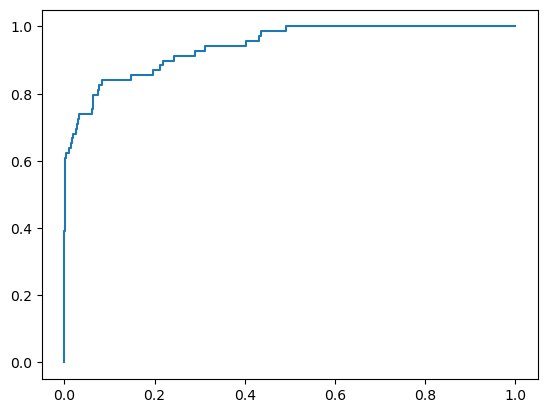

In [46]:
plt.plot(fpr,tpr)

In [47]:
#tpr=tp/(tp+fn)
tpr1=1930/(1930+1)
tpr1

0.9994821336095288

In [48]:
#fpr=fp/(fp+tn)
fpr1= 35/( 35+34)
fpr1

0.5072463768115942

In [49]:
#precision=tp/(tp+fp)
precision1=1930/(1930+35)
precision1

0.9821882951653944

In [50]:
#f1-score=2(precision*recall)/(precision+recall)
f1score1=(2*(precision1*tpr1))/(precision1+tpr1)
f1score1

0.9907597535934292

# Decision Tree

In [51]:
#dt
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [52]:
dt.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [53]:
dt_p=dt.predict(x_te)
dt_p

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [54]:
dt_m=confusion_matrix(dt_p,y_te)
dt_m

array([[1925,    1],
       [   6,   68]], dtype=int64)

In [55]:
dt_acc=dt_m.diagonal().sum()/dt_m.sum()*100
dt_acc

99.65

In [56]:
print(classification_report(dt_p,y_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1926
           1       0.99      0.92      0.95        74

    accuracy                           1.00      2000
   macro avg       0.99      0.96      0.97      2000
weighted avg       1.00      1.00      1.00      2000



In [57]:
#tpr=tp/(tp+fn)
tpr2=1925/(1925+6)
tpr2

0.9968928016571724

In [58]:
#fpr=fp/(fp+tn)
fpr2= 1/( 1+68)
fpr2

0.014492753623188406

In [59]:
#precision=tp/(tp+fp)
precision2=1925/(1925+1)
precision2

0.9994807892004154

In [60]:
#f1-score=2(precision*recall)/(precision+recall)
f1score2=(2*(precision2*tpr2))/(precision2+tpr2)
f1score2

0.9981851179673321

# Random Forest

In [61]:
#rf
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [62]:
rf.fit(x_tr,y_tr)

RandomForestClassifier()

In [63]:
rf_pre=rf.predict(x_te)
rf_pre

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [64]:
rf_mat=confusion_matrix(rf_pre,y_te)
rf_mat

array([[1931,    1],
       [   0,   68]], dtype=int64)

In [65]:
rf_acc=rf_mat.diagonal().sum()/rf_mat.sum()*100
rf_acc

99.95

In [66]:
print(classification_report (rf_pre,y_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       0.99      1.00      0.99        68

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [67]:
#tpr=tp/(tp+fn)
tpr3=1931/(1931+0)
tpr3

1.0

In [68]:
#fpr=fp/(fp+tn)
fpr3= 1/( 1+68)
fpr3

0.014492753623188406

In [69]:
#precision=tp/(tp+fp)
precision3=1931/(1931+1)
precision3

0.9994824016563147

In [70]:
#f1-score=2(precision*recall)/(precision+recall)
f1score3=(2*(precision3*tpr3))/(precision3+tpr3)
f1score3

0.9997411338338079

# K Nearest Neighbors

In [71]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25)

In [72]:
knn.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=25)

In [73]:
knn_p=knn.predict(x_te)
knn_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
knn_m=confusion_matrix(knn_p,y_te)
knn_m

array([[1929,   57],
       [   2,   12]], dtype=int64)

In [75]:
knn_acc=knn_m.diagonal().sum()/knn_m.sum()*100
knn_acc

97.05

In [76]:
print(classification_report(knn_p,y_te))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1986
           1       0.17      0.86      0.29        14

    accuracy                           0.97      2000
   macro avg       0.59      0.91      0.64      2000
weighted avg       0.99      0.97      0.98      2000



In [77]:
#tpr=tp/(tp+fn)
tpr4=1929/(1929+2)
tpr4

0.9989642672190575

In [78]:
#fpr=fp/(fp+tn)
fpr4= 57/( 57+12)
fpr4

0.8260869565217391

In [79]:
#precision=tp/(tp+fp)
precision4=1929/(1929+57)
precision4

0.9712990936555891

In [80]:
#f1-score=2(precision*recall)/(precision+recall)
f1score4=(2*(precision4*tpr4))/(precision4+tpr4)
f1score4

0.9849374521317334

# Naive Bayes

In [81]:
#nb
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [82]:
nb.fit(x_tr,y_tr)

MultinomialNB()

In [83]:
nb_p=nb.predict(x_te)



In [84]:
nb_m=confusion_matrix(nb_p,y_te)
nb_m


array([[1299,   24],
       [ 632,   45]], dtype=int64)

In [85]:
nb_acc=nb_m.diagonal().sum()/nb_m.sum()*100
nb_acc

67.2

In [86]:
print(classification_report(nb_p,y_te))

              precision    recall  f1-score   support

           0       0.67      0.98      0.80      1323
           1       0.65      0.07      0.12       677

    accuracy                           0.67      2000
   macro avg       0.66      0.52      0.46      2000
weighted avg       0.67      0.67      0.57      2000



In [87]:
#tpr=tp/(tp+fn)
tpr5=1299/(1299+632)
tpr5

0.6727084412221647

In [88]:
#fpr=fp/(fp+tn)
fpr5= 24/( 24+45)
fpr5

0.34782608695652173

In [89]:
#precision=tp/(tp+fp)
precision5=1299/(1299+24)
precision5

0.981859410430839

In [90]:
#f1-score=2(precision*recall)/(precision+recall)
f1score5=(2*(precision5*tpr5))/(precision5+tpr5)
f1score5

0.7984019668100798

# Support Vector Machine

In [91]:
#svm
from sklearn.svm import SVC
svc=SVC()

In [92]:
svc.fit(x_tr,y_tr)

SVC()

In [93]:
svc_p=svc.predict(x_te)

In [94]:
svc_m=confusion_matrix(svc_p,y_te)
svc_m

array([[1931,   69],
       [   0,    0]], dtype=int64)

In [95]:
svc_acc=svc_m.diagonal().sum()/svc_m.sum()*100
svc_acc

96.55

In [96]:
print(classification_report(svc_p,y_te))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2000
           1       0.00      0.00      0.00         0

    accuracy                           0.97      2000
   macro avg       0.50      0.48      0.49      2000
weighted avg       1.00      0.97      0.98      2000



In [97]:
#tpr=tp/(tp+fn)
tpr6=1931/(1931+0)
tpr6

1.0

In [98]:
#fpr=fp/(fp+tn)
fpr6= 69/( 69+0)
fpr6

1.0

In [99]:
#precision=tp/(tp+fp)
precision6=1931/(1931+69)
precision6

0.9655

In [100]:
#f1-score=2(precision*recall)/(precision+recall)
f1score6=(2*(precision6*tpr6))/(precision6+tpr6)
f1score6

0.9824472144492495

# knn

In [101]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)

In [102]:
knn.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=15)

In [103]:
knn_p=knn.predict(x_te)

In [104]:
knn_m=confusion_matrix(knn_p,y_te)
knn_m

array([[1925,   54],
       [   6,   15]], dtype=int64)

In [105]:
knn_acc=knn_m.diagonal().sum()/knn_m.sum()*100
knn_acc

97.0

In [106]:
print(classification_report(knn_p,y_te))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1979
           1       0.22      0.71      0.33        21

    accuracy                           0.97      2000
   macro avg       0.61      0.84      0.66      2000
weighted avg       0.99      0.97      0.98      2000



In [107]:
lst=list()

In [108]:
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_tr,y_tr)
    knp=knn.predict(x_te)
    c=confusion_matrix(knp,y_te)
    acc=c.diagonal().sum()/c.sum()*100
    lst.append(acc)

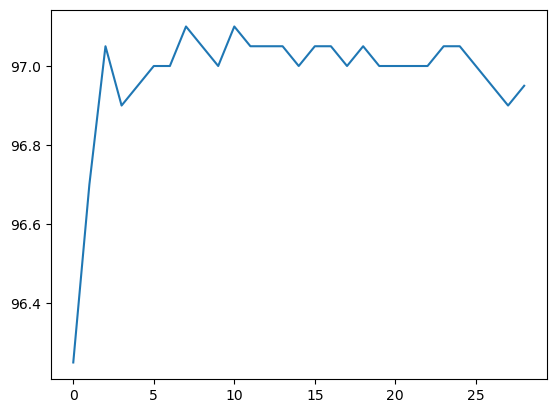

In [109]:
p=plt.plot(lst)

In [110]:
#tpr=tp/(tp+fn)
tpr6=1925/(1925+6)
tpr6

0.9968928016571724

In [111]:
#fpr=fp/(fp+tn)
fpr6= 54/(54+15)
fpr6

0.782608695652174

In [112]:
#precision=tp/(tp+fp)
precision6=1925/(1925+54)
precision6

0.9727134916624558

In [113]:
#f1-score=2(precision*recall)/(precision+recall)
f1score6=(2*(precision6*tpr6))/(precision6+tpr6)
f1score6

0.9846547314578004

# adaboost 

In [114]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [115]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [116]:
adbo.fit(x_tr,y_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [117]:
adbo_p=adbo.predict(x_te)

In [118]:
adboo_m=confusion_matrix(adbo_p,y_te)
adboo_m

array([[1927,    1],
       [   4,   68]], dtype=int64)

In [119]:
adbo_acc=adboo_m.diagonal().sum()/adboo_m.sum()*100
adbo_acc

99.75

In [120]:
print(classification_report(adbo_p,y_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1928
           1       0.99      0.94      0.96        72

    accuracy                           1.00      2000
   macro avg       0.99      0.97      0.98      2000
weighted avg       1.00      1.00      1.00      2000



In [121]:
#tpr=tp/(tp+fn)
tpr7=1927/(1927+4)
tpr7

0.9979285344381149

In [122]:
#fpr=fp/(fp+tn)
fpr7= 1/(1+ 68)
fpr7

0.014492753623188406

In [123]:
#precision=tp/(tp+fp)
precision7=1927/(1927+1)
precision7

0.9994813278008299

In [124]:
#f1-score=2(precision*recall)/(precision+recall)
f1score7=(2*(precision7*tpr7))/(precision7+tpr7)
f1score7

0.9987043275459963

# xgboost

In [125]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [126]:
xgb.fit(x_tr,y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [127]:
xgb_p=xgb.predict(x_te)

In [128]:
xgb_m=confusion_matrix(xgb_p,y_te)
xgb_m

array([[1931,    1],
       [   0,   68]], dtype=int64)

In [129]:
xgb_acc=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_acc

99.95

In [130]:
print(classification_report(xgb_p,y_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       0.99      1.00      0.99        68

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [139]:
#tpr=tp/(tp+fn)
tpr8=1931/(1931+0)
tpr8

1.0

In [140]:
#fpr=fp/(fp+tn)
fpr8= 1/(1+ 68)
fpr8

0.014492753623188406

In [133]:
#precision=tp/(tp+fp)
precision8=1931/(1931+1)
precision8

0.9994824016563147

In [134]:
#f1-score=2(precision*recall)/(precision+recall)
f1score8=(2*(precision8*tpr8))/(precision8+tpr8)
f1score8

0.9997411338338079

In [135]:
fpr8,tpr8,threshold8=roc_curve(y_te,xgb_p)

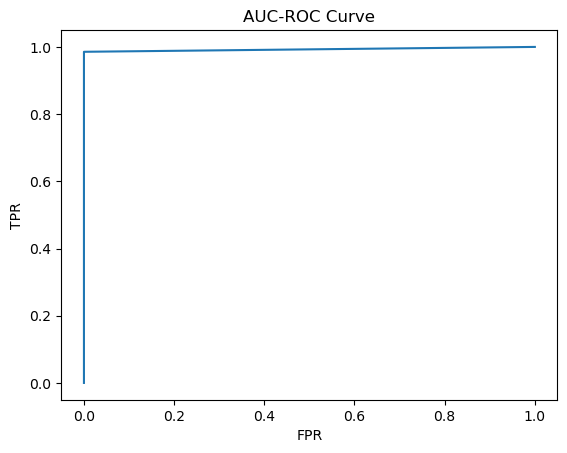

In [136]:
plt.title("AUC-ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr8,tpr8)

In [141]:
#df -1
l1=["log","dt","rf","nb","svc","knn","adaboost","xgboost"]
l2=[lg_acc,dt_acc,rf_acc,nb_acc,svc_acc,knn_acc,adbo_acc,xgb_acc]
l3=[fpr1,fpr2,fpr3,fpr4,fpr5,fpr6,fpr7,fpr8]
l4=[tpr1,tpr2,tpr3,tpr4,tpr5,tpr6,tpr7,tpr8]
l5=[f1score1,f1score2,f1score3,f1score4,f1score5,f1score6,f1score7,f1score8]

In [142]:
final=pd.DataFrame({"Model_Name":l1,"accuracy":l2,"fpr":l3,"tpr":l4,"f1score":l5})
final

,Model_Name,accuracy,fpr,tpr,f1score
0,log,98.20,0.507246,0.999482,0.990760
1,dt,99.65,0.014493,0.996893,0.998185
2,rf,99.95,0.014493,1.000000,0.999741
3,nb,67.20,0.826087,0.998964,0.984937
4,svc,96.55,0.347826,0.672708,0.798402
5,knn,97.00,0.782609,0.996893,0.984655
6,adaboost,99.75,0.014493,0.997929,0.998704
7,xgboost,99.95,0.014493,1.000000,0.999741


# class imbalance

In [143]:
#randomundersampling
c_0,c_1=data["Target"].value_counts()
c_0,c_1

(9661, 339)

In [144]:
train_0=data[data["Target"]==0]
train_1=data[data["Target"]==1]

In [145]:
train_0.shape,train_1.shape

((9661, 8), (339, 8))

In [146]:
train_0under=train_0.sample(c_1)

In [147]:
train_0under.shape

(339, 8)

In [148]:
class0_1=pd.concat([train_0under,train_1],axis=0)

In [149]:
class0_1.shape

(678, 8)

In [150]:
class0_1.head(2)

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Failure_Type,Target
7701,0,300.8,311.7,1468,38.7,39,1,0
3649,1,302.2,311.5,1481,40.4,93,1,0


In [151]:
class0_1.Target.value_counts()

Target
0    339
1    339
Name: count, dtype: int64

# outlier

In [152]:
data.columns

Index(['Type', 'Air_temperature', 'Process_temperature', 'Rotational_speed',
       'Torque', 'Tool_wear', 'Failure_Type', 'Target'],
      dtype='object')

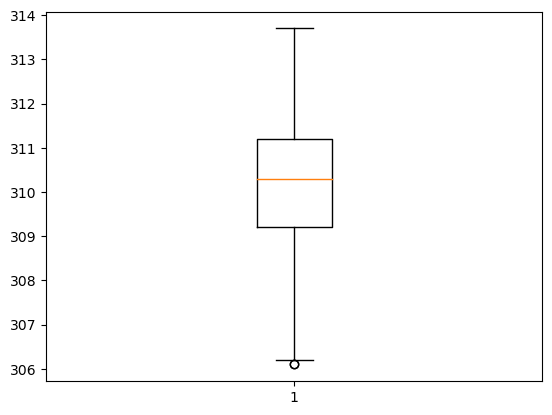

In [154]:
plt.boxplot(class0_1["Process_temperature"])
plt.show()

<Axes: xlabel='Process_temperature', ylabel='Density'>

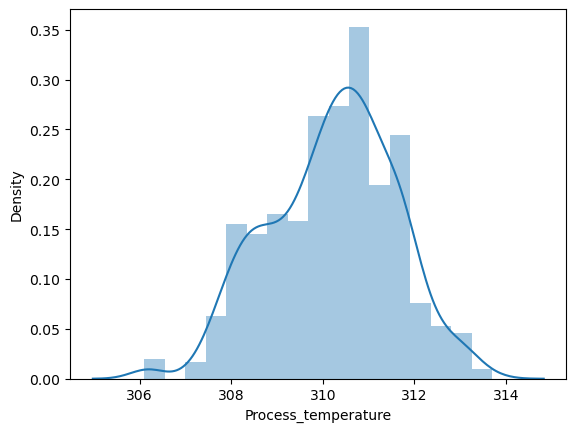

In [155]:
sns.distplot(class0_1["Process_temperature"])

In [156]:
up=class0_1["Process_temperature"].mean()+3*class0_1["Process_temperature"].std()
lb=class0_1["Process_temperature"].mean()-3*class0_1["Process_temperature"].std()
print(up,lb)

314.35194341734484 306.06929552070824


In [157]:
class0_1.loc[class0_1["Process_temperature"]<305.8077847207726,"Process_temperature"]=305.8077847207726

<Axes: xlabel='Process_temperature', ylabel='Density'>

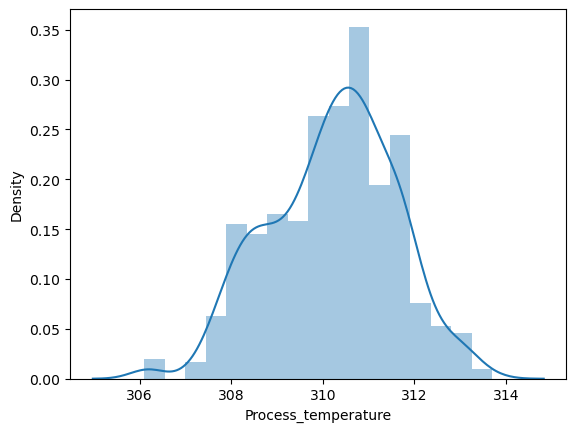

In [399]:
sns.distplot(class0_1["Process_temperature"])

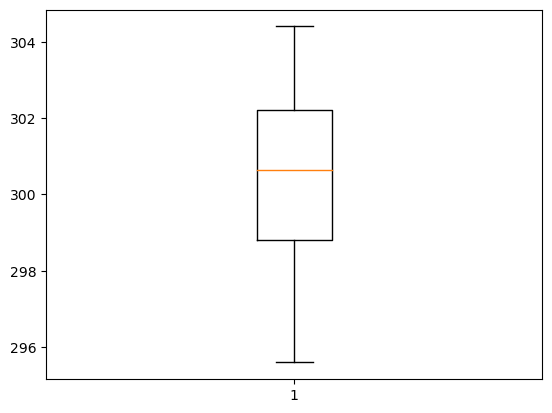

In [158]:
plt.boxplot(class0_1["Air_temperature"])
plt.show()

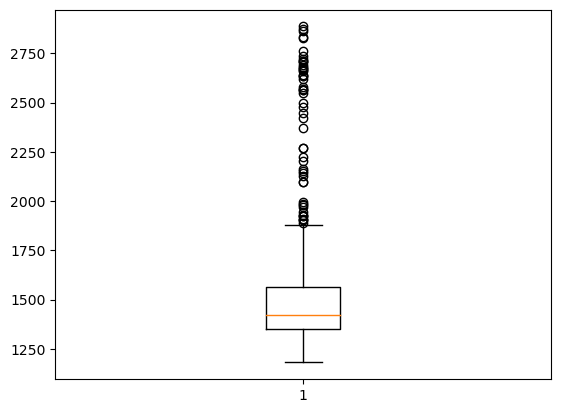

In [159]:
plt.boxplot(class0_1["Rotational_speed"])
plt.show()

<Axes: xlabel='Rotational_speed', ylabel='Density'>

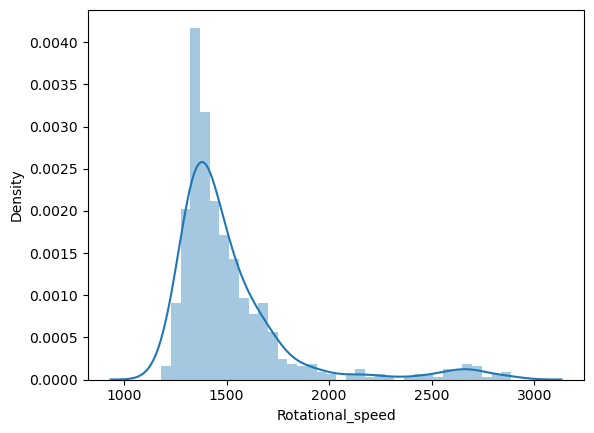

In [160]:
sns.distplot(class0_1["Rotational_speed"])

In [161]:
IQR1=class0_1.Rotational_speed.quantile(0.75)-class0_1.Rotational_speed.quantile(0.25)
IQR1

211.0

In [162]:
lb1=class0_1["Rotational_speed"].quantile(0.75)-IQR1*3
ub1=class0_1["Rotational_speed"].quantile(0.25)+IQR1*3
lb1,ub1

(931.0, 1986.0)

In [163]:
class0_1.loc[class0_1["Rotational_speed"]>1983.0,"Rotational_speed"]=1983.0

<Axes: xlabel='Rotational_speed', ylabel='Density'>

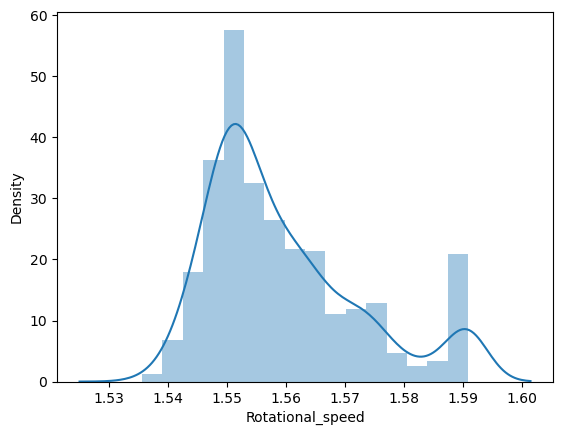

In [400]:
sns.distplot(class0_1["Rotational_speed"])

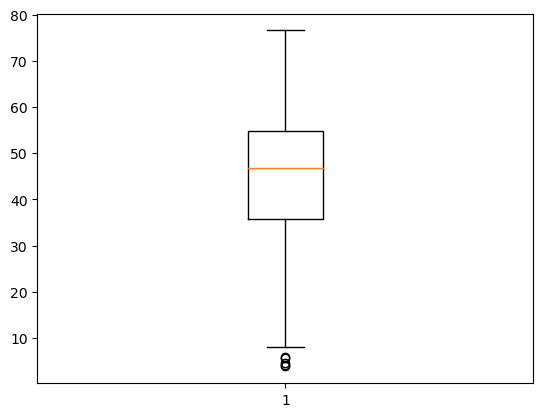

In [164]:
plt.boxplot(class0_1["Torque"])
plt.show()

<Axes: xlabel='Torque', ylabel='Density'>

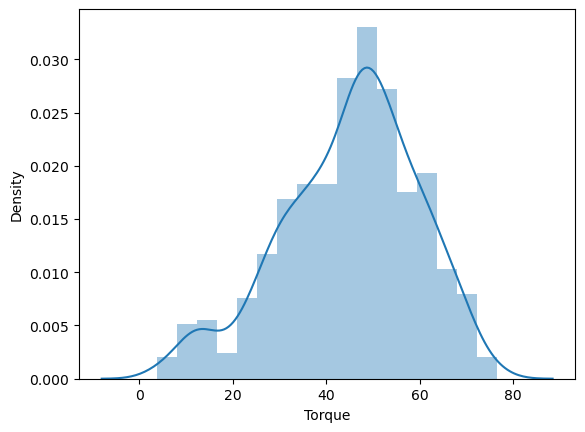

In [165]:
sns.distplot(class0_1["Torque"])

In [166]:
up2=class0_1["Torque"].mean()+3*class0_1["Torque"].std()
lb2=class0_1["Torque"].mean()-3*class0_1["Torque"].std()
print(up2,lb2)

88.81137192137768 1.2544097895367656


In [167]:
class0_1.loc[class0_1["Torque"]<1.4974516695815865,"Torque"]=1.4974516695815865

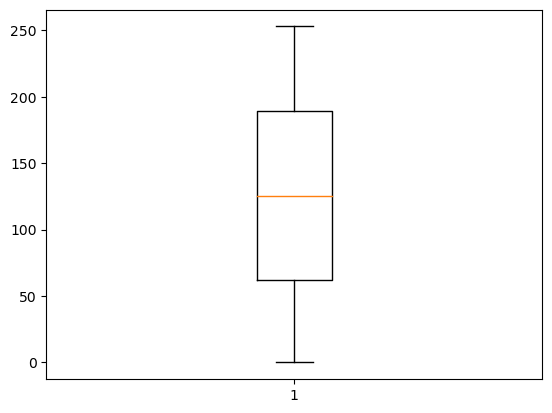

In [168]:
plt.boxplot(class0_1["Tool_wear"])
plt.show()

In [169]:
class0_1.skew()

Type                   0.070287
Air_temperature       -0.247893
Process_temperature   -0.237567
Rotational_speed       1.257263
Torque                -0.460219
Tool_wear             -0.107589
Failure_Type           1.264948
Target                 0.000000
dtype: float64

In [170]:
class0_1.shape

(678, 8)

In [171]:
d1=class0_1[class0_1.Rotational_speed>0]

In [172]:
d1.shape

(678, 8)

In [177]:
class0_1["Rotational_speed"]=np.sqrt(class0_1["Rotational_speed"])

In [178]:
class0_1.Rotational_speed.skew()

1.010015394395331

# visualization


In [179]:
data.dtypes

Type                     int32
Air_temperature        float64
Process_temperature    float64
Rotational_speed         int64
Torque                 float64
Tool_wear                int64
Failure_Type             int32
Target                   int64
dtype: object

<Axes: xlabel='Type'>

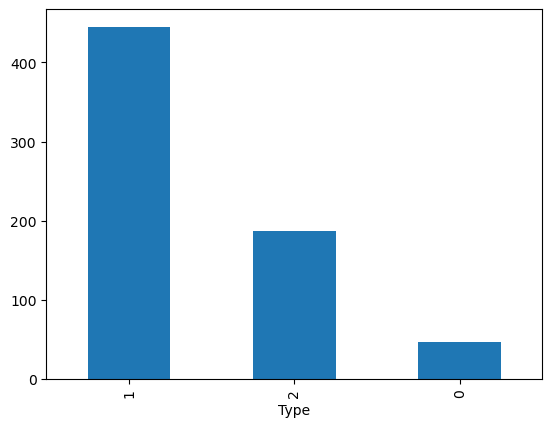

In [180]:
class0_1["Type"].value_counts().plot.bar()

<Axes: xlabel='Failure_Type', ylabel='count'>

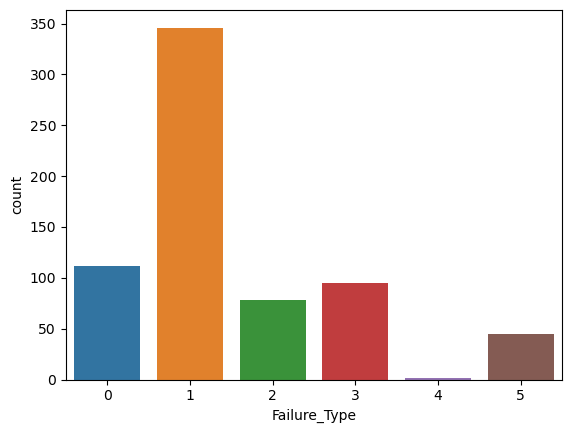

In [181]:
sns.countplot(x="Failure_Type", data=class0_1)

<Axes: xlabel='Tool_wear', ylabel='Count'>

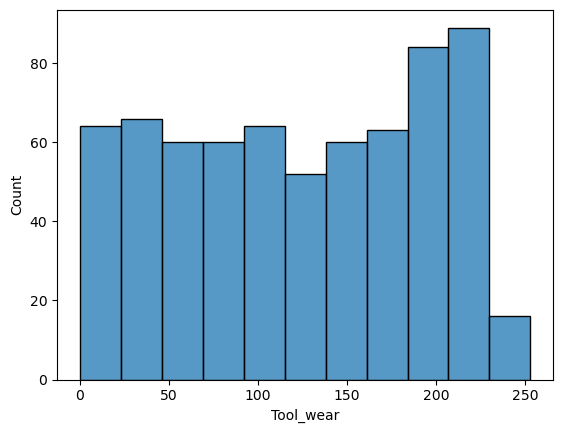

In [182]:
sns.histplot(class0_1["Tool_wear"])

<Axes: xlabel='Air_temperature', ylabel='Count'>

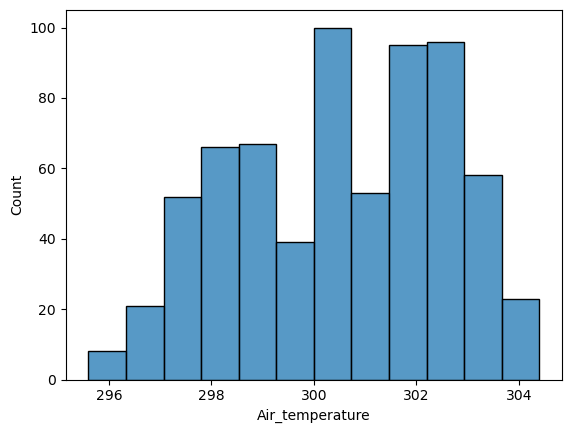

In [183]:
sns.histplot(class0_1["Air_temperature"])

<Axes: xlabel='Process_temperature', ylabel='Count'>

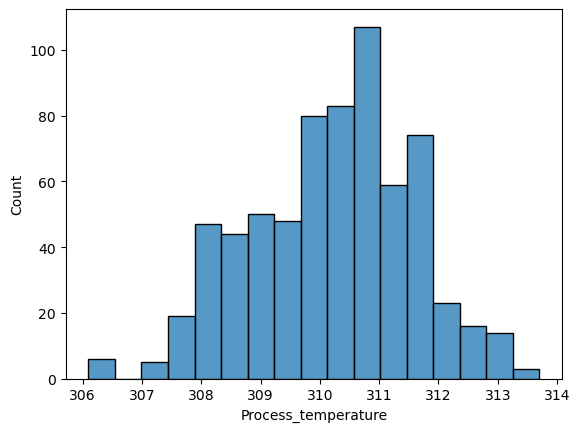

In [184]:
sns.histplot(class0_1["Process_temperature"])

In [185]:
cor=class0_1.corr()
cor

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Failure_Type,Target
Type,1.000000,0.025554,0.009369,0.025279,-0.017299,-0.053788,-0.006496,-0.045747
Air_temperature,0.025554,1.000000,0.850768,-0.105984,0.051890,-0.098580,-0.226600,0.183857
Process_temperature,0.009369,0.850768,1.000000,-0.023930,-0.002300,-0.070439,-0.110575,0.057739
Rotational_speed,0.025279,-0.105984,-0.023930,1.000000,-0.919288,-0.068589,0.188287,-0.291002
Torque,-0.017299,0.051890,-0.002300,-0.919288,1.000000,0.071774,-0.058130,0.352162
Tool_wear,-0.053788,-0.098580,-0.070439,-0.068589,0.071774,1.000000,0.343444,0.294049
Failure_Type,-0.006496,-0.226600,-0.110575,0.188287,-0.058130,0.343444,1.000000,0.376104
Target,-0.045747,0.183857,0.057739,-0.291002,0.352162,0.294049,0.376104,1.000000


<Axes: >

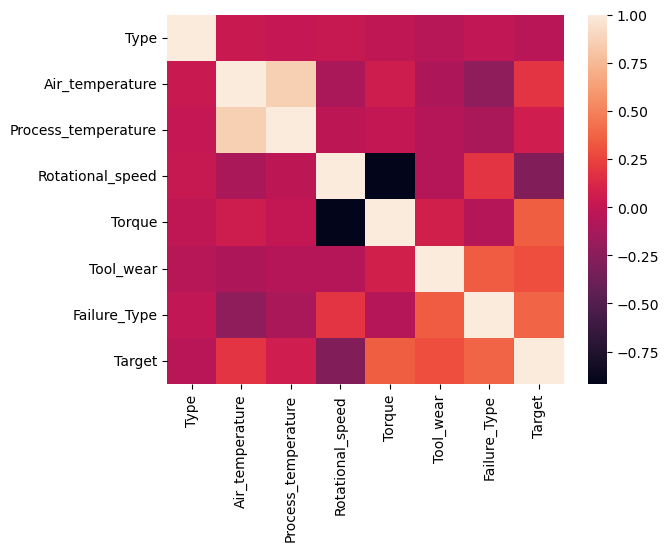

In [186]:
sns.heatmap(cor)

<Axes: xlabel='Target'>

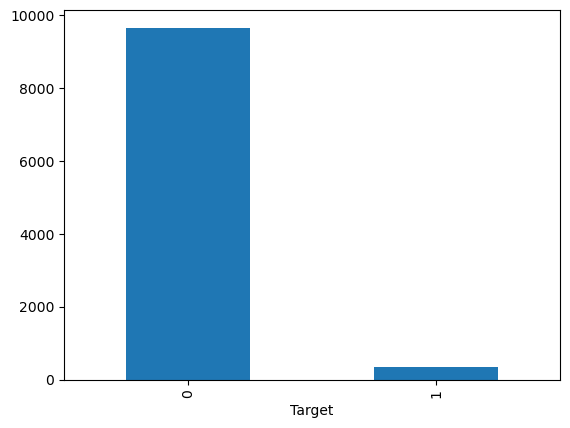

In [187]:
data["Target"].value_counts().plot.bar()

<Axes: xlabel='Target'>

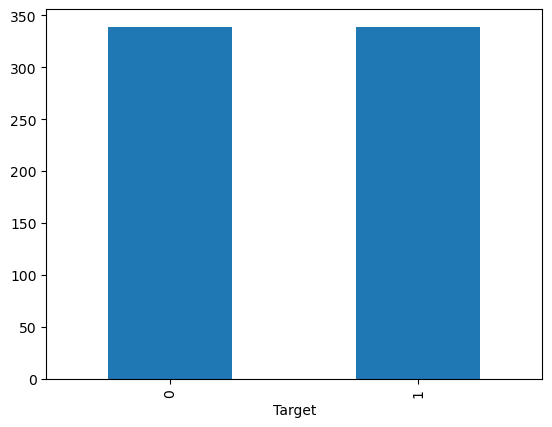

In [188]:
class0_1["Target"].value_counts().plot.bar()

# Model Build

In [189]:
xo=class0_1.iloc[:,:-1]
yo=class0_1.iloc[:,-1]

In [190]:
x1_tr,x1_te,y1_tr,y1_te=train_test_split(xo,yo,test_size=0.2,random_state=100)

In [191]:
x1_tr.shape,x1_te.shape,y1_tr.shape,y1_te.shape

((542, 7), (136, 7), (542,), (136,))

# Logistic Regression

In [192]:
#log
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [193]:
lg.fit(x1_tr,y1_tr)

LogisticRegression()

In [194]:
lg_p1=lg.predict(x1_te)
lg_p1

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0], dtype=int64)

In [195]:
lg_m1=confusion_matrix(lg_p1,y1_te)
lg_m1

array([[61, 16],
       [15, 44]], dtype=int64)

In [196]:
lg_acc1=lg_m1.diagonal().sum()/lg_m1.sum()*100
lg_acc1

77.20588235294117

In [197]:
print(classification_report(lg_p1,y1_te))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        77
           1       0.73      0.75      0.74        59

    accuracy                           0.77       136
   macro avg       0.77      0.77      0.77       136
weighted avg       0.77      0.77      0.77       136



In [198]:
#tpr=tp/(tp+fn)
tpr8= 61/(61+15)
tpr8

0.8026315789473685

In [199]:
#fpr=fp/(fp+tn)
fpr8=16/(16+44)
fpr8

0.26666666666666666

In [200]:
#precision=tp/(tp+fp)
precision8=61/(61+16)
precision8

0.7922077922077922

In [201]:
#f1-score=2(precision*recall)/(precision+recall)
f1score8=(2*(precision8*tpr8))/(precision8+tpr8)
f1score8


0.7973856209150327

# Descision Tree

In [202]:
#dt
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [203]:
dt.fit(x1_tr,y1_tr)

DecisionTreeClassifier()

In [204]:
dt_p1=dt.predict(x1_te)
dt_p1

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0], dtype=int64)

In [205]:
dt_m1=confusion_matrix(dt_p1,y1_te)
dt_m1

array([[74,  3],
       [ 2, 57]], dtype=int64)

In [206]:
dt_acc1=dt_m1.diagonal().sum()/dt_m1.sum()*100
dt_acc1

96.32352941176471

In [207]:
print(classification_report(dt_p1,y1_te))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        77
           1       0.95      0.97      0.96        59

    accuracy                           0.96       136
   macro avg       0.96      0.96      0.96       136
weighted avg       0.96      0.96      0.96       136



In [208]:
#tpr=tp/(tp+fn)
tpr9=74/(74+2)
tpr9

0.9736842105263158

In [209]:
#fpr=fp/(fp+tn)
fpr9=3/(3+57)
fpr9

0.05

In [210]:
#precision=tp/(tp+fp)
precision9=74/(74+3)
precision9

0.961038961038961

In [211]:
#f1-score=2(precision*recall)/(precision+recall)
f1score9=(2*(precision9*tpr9))/(precision9+tpr9)
f1score9

0.9673202614379085

# Random Forest

In [212]:
#rf
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [213]:
rf.fit(x1_tr,y1_tr)

RandomForestClassifier()

In [214]:
rf_pre1=rf.predict(x1_te)
rf_pre1

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0], dtype=int64)

In [215]:
rf_mat1=confusion_matrix(rf_pre1,y1_te)
rf_mat1

array([[74,  3],
       [ 2, 57]], dtype=int64)

In [216]:
rf_acc1=rf_mat1.diagonal().sum()/rf_mat1.sum()*100
rf_acc1

96.32352941176471

In [217]:
print(classification_report (rf_pre1,y1_te))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        77
           1       0.95      0.97      0.96        59

    accuracy                           0.96       136
   macro avg       0.96      0.96      0.96       136
weighted avg       0.96      0.96      0.96       136



In [280]:
#tpr=tp/(tp+fn)
tpr10=74/(74+2)
tpr10

0.9736842105263158

In [281]:
#fpr=fp/(fp+tn)
fpr10=3/(3+57)
fpr10

0.05

In [282]:
#precision=tp/(tp+fp)
precision10=74/(74+3)
precision10

0.961038961038961

In [283]:
#f1-score=2(precision*recall)/(precision+recall)
f1score10=(2*(precision10*tpr10))/(precision10+tpr10)
f1score10

0.9673202614379085

# Naive Bayes

In [222]:
#nb
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [223]:
nb.fit(x1_tr,y1_tr)

MultinomialNB()

In [224]:
nb_p1=nb.predict(x1_te)

In [225]:
nb_m1=confusion_matrix(nb_p1,y1_te)
nb_m1

array([[53, 22],
       [23, 38]], dtype=int64)

In [226]:
nb_acc1=nb_m1.diagonal().sum()/nb_m1.sum()*100
nb_acc1

66.91176470588235

In [227]:
print(classification_report(nb_p1,y1_te))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70        75
           1       0.63      0.62      0.63        61

    accuracy                           0.67       136
   macro avg       0.67      0.66      0.67       136
weighted avg       0.67      0.67      0.67       136



In [228]:
#tpr=tp/(tp+fn)
tpr11=53/(53+23)
tpr11

0.6973684210526315

In [229]:
#fpr=fp/(fp+tn)
fpr11=22/(22+38)
fpr11

0.36666666666666664

In [230]:
#precision=tp/(tp+fp)
precision11=53/(53+22)
precision11

0.7066666666666667

In [231]:
#f1-score=2(precision*recall)/(precision+recall)
f1score11=(2*(precision11*tpr11))/(precision11+tpr11)
f1score11

0.7019867549668874

# SVM

In [232]:
#svm
from sklearn.svm import SVC
svc=SVC()

In [233]:
svc.fit(x1_tr,y1_tr)

SVC()

In [234]:
svc_p1=svc.predict(x1_te)

In [235]:
svc_m1=confusion_matrix(svc_p1,y1_te)
svc_m1

array([[64, 26],
       [12, 34]], dtype=int64)

In [236]:
svc_acc1=svc_m1.diagonal().sum()/svc_m1.sum()*100
svc_acc1

72.05882352941177

In [237]:
print(classification_report(svc_p1,y1_te))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77        90
           1       0.57      0.74      0.64        46

    accuracy                           0.72       136
   macro avg       0.70      0.73      0.71       136
weighted avg       0.75      0.72      0.73       136



In [238]:
#tpr=tp/(tp+fn)
tpr12=64/(64+12)
tpr12

0.8421052631578947

In [239]:
#fpr=fp/(fp+tn)
fpr12=26/(26+34)
fpr12

0.43333333333333335

In [240]:
#precision=tp/(tp+fp)
precision12=64/(64+26)
precision12

0.7111111111111111

In [241]:
#f1-score=2(precision*recall)/(precision+recall)
f1score12=(2*(precision12*tpr12))/(precision12+tpr12)
f1score12

0.7710843373493975

# Knn

In [242]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)

In [243]:
knn.fit(x1_tr,y1_tr)

KNeighborsClassifier(n_neighbors=15)

In [244]:
knn_p1=knn.predict(x1_te)

In [245]:
knn_m1=confusion_matrix(knn_p1,y1_te)
knn_m1

array([[61, 23],
       [15, 37]], dtype=int64)

In [246]:
knn_acc1=knn_m1.diagonal().sum()/knn_m1.sum()*100
knn_acc1

72.05882352941177

In [247]:
print(classification_report(knn_p1,y1_te))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        84
           1       0.62      0.71      0.66        52

    accuracy                           0.72       136
   macro avg       0.71      0.72      0.71       136
weighted avg       0.73      0.72      0.72       136



In [248]:
lst=list()

In [249]:
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x1_tr,y1_tr)
    knp1=knn.predict(x1_te)
    c1=confusion_matrix(knp1,y1_te)
    acc1=c1.diagonal().sum()/c1.sum()*100
    lst.append(acc1)

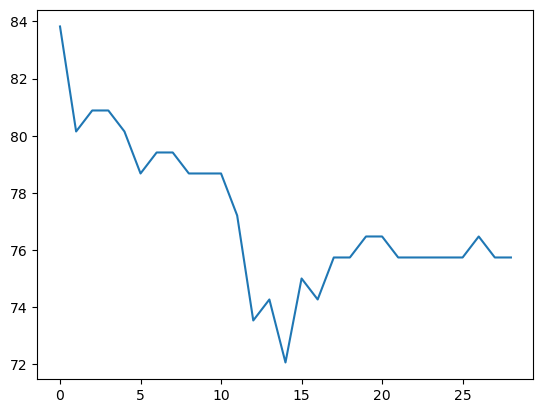

In [250]:
p1=plt.plot(lst)

In [251]:
#tpr=tp/(tp+fn)
tpr13=61/(61+15)
tpr13

0.8026315789473685

In [252]:
#fpr=fp/(fp+tn)
fpr13=23/(23+37)
fpr13

0.38333333333333336

In [253]:
#precision=tp/(tp+fp)
precision13=61/(61+23)
precision13

0.7261904761904762

In [254]:
#f1-score=2(precision*recall)/(precision+recall)
f1score13=(2*(precision13*tpr13))/(precision13+tpr13)
f1score13

0.7625

# adaboost

In [255]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [256]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [257]:
adbo.fit(x1_tr,y1_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [258]:
adbo_p1=adbo.predict(x1_te)

In [259]:
adboo_m1=confusion_matrix(adbo_p1,y1_te)
adboo_m1

array([[73,  3],
       [ 3, 57]], dtype=int64)

In [260]:
adbo_acc1=adboo_m1.diagonal().sum()/adboo_m1.sum()*100
adbo_acc1

95.58823529411765

In [261]:
print(classification_report(adbo_p1,y1_te))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        76
           1       0.95      0.95      0.95        60

    accuracy                           0.96       136
   macro avg       0.96      0.96      0.96       136
weighted avg       0.96      0.96      0.96       136



In [262]:
#tpr=tp/(tp+fn)
tpr14=73/(73+3)
tpr14

0.9605263157894737

In [263]:
#fpr=fp/(fp+tn)
fpr14=3/(3+57)
fpr14

0.05

In [264]:
#precision=tp/(tp+fp)
precision14=73/(73+3)
precision14

0.9605263157894737

In [265]:
#f1-score=2(precision*recall)/(precision+recall)
f1score14=(2*(precision14*tpr14))/(precision14+tpr14)
f1score14

0.9605263157894737

# xgboost

In [266]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [267]:
xgb.fit(x1_tr,y1_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [268]:
xgb_p1=xgb.predict(x1_te)

In [269]:
xgb_m1=confusion_matrix(xgb_p1,y1_te)
xgb_m1

array([[76,  3],
       [ 0, 57]], dtype=int64)

In [270]:
xgb_acc1=xgb_m1.diagonal().sum()/xgb_m1.sum()*100
xgb_acc1

97.79411764705883

In [271]:
print(classification_report(xgb_p1,y1_te))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        79
           1       0.95      1.00      0.97        57

    accuracy                           0.98       136
   macro avg       0.97      0.98      0.98       136
weighted avg       0.98      0.98      0.98       136



In [272]:
#tpr=tp/(tp+fn)
tpr15=76/(76+0)
tpr15

1.0

In [273]:
#fpr=fp/(fp+tn)
fpr15=3/(3+57)
fpr15

0.05

In [274]:
#precision=tp/(tp+fp)
precision15=76/(76+3)
precision15

0.9620253164556962

In [275]:
#f1-score=2(precision*recall)/(precision+recall)
f1score15=(2*(precision15*tpr15))/(precision15+tpr15)
f1score15

0.9806451612903226

In [276]:
fpr10,tpr10,threshold10=roc_curve(y_te,rf_pre)

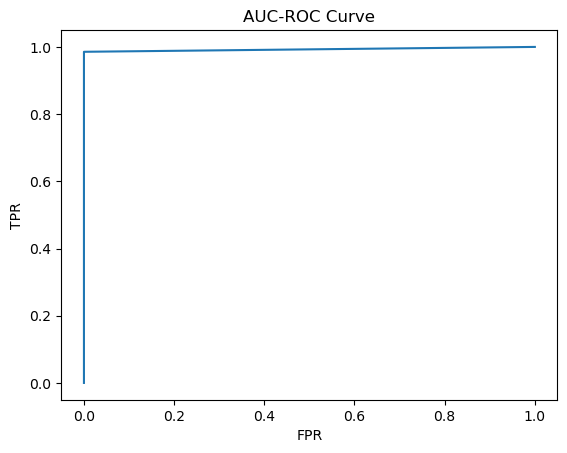

In [277]:
plt.title("AUC-ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr10,tpr10)

In [284]:
#df_2
l1=["log","dt","rf","nb","svc","knn","adaboost","xgboost"]
l2=[lg_acc1,dt_acc1,rf_acc1,nb_acc1,svc_acc1,knn_acc1,adbo_acc1,xgb_acc1]
l3=[fpr8,fpr9,fpr10,fpr11,fpr12,fpr13,fpr14,fpr15]
l4=[tpr8,tpr9,tpr10,tpr11,tpr12,tpr13,tpr14,tpr15]
l5=[f1score8,f1score9,f1score10,f1score11,f1score12,f1score13,f1score14,f1score15]

In [285]:
final1=pd.DataFrame({"Model_Name":l1,"accuracy":l2,"fpr":l3,"tpr":l4,"f1score":l5})
final1

,Model_Name,accuracy,fpr,tpr,f1score
0,log,77.205882,0.266667,0.802632,0.797386
1,dt,96.323529,0.050000,0.973684,0.967320
2,rf,96.323529,0.050000,0.973684,0.967320
3,nb,66.911765,0.366667,0.697368,0.701987
4,svc,72.058824,0.433333,0.842105,0.771084
5,knn,72.058824,0.383333,0.802632,0.762500
6,adaboost,95.588235,0.050000,0.960526,0.960526
7,xgboost,97.794118,0.050000,1.000000,0.980645


# Feature Selection

In [286]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dTree=DecisionTreeClassifier()

In [287]:
rfe=RFE(dTree)

In [288]:
rfe.fit(class0_1.iloc[:,:-1],class0_1.iloc[:,-1])

RFE(estimator=DecisionTreeClassifier())

In [289]:
rfe.support_

array([False, False, False,  True, False,  True,  True])

In [290]:
rfe_df=pd.DataFrame({"Importances":list(rfe.support_),"Columns":list(class0_1.iloc[:,:-1].columns)})
rfe_df

,Importances,Columns
0,False,Type
1,False,Air_temperature
2,False,Process_temperature
3,True,Rotational_speed
4,False,Torque
5,True,Tool_wear
6,True,Failure_Type


In [291]:
sorted_df =rfe_df.sort_values(["Importances"],ascending=False)
sorted_df

,Importances,Columns
3,True,Rotational_speed
5,True,Tool_wear
6,True,Failure_Type
0,False,Type
1,False,Air_temperature
2,False,Process_temperature
4,False,Torque


In [292]:
class0_1.columns

Index(['Type', 'Air_temperature', 'Process_temperature', 'Rotational_speed',
       'Torque', 'Tool_wear', 'Failure_Type', 'Target'],
      dtype='object')

In [299]:
d1=class0_1.drop(["Type","Air_temperature","Torque","Process_temperature"],axis=1)

In [300]:
d1.head(1)

,Rotational_speed,Tool_wear,Failure_Type,Target
7701,1.559023,39,1,0


In [301]:
x2=d1.iloc[:,:-1]
y2=d1.iloc[:,-1]

In [302]:
x2.head(1)

,Rotational_speed,Tool_wear,Failure_Type
7701,1.559023,39,1


In [303]:
y2.head()

7701    0
3649    0
7243    0
3992    0
78      0
Name: Target, dtype: int64

In [304]:
from sklearn.model_selection import train_test_split

In [305]:
x2_tr,x2_te,y2_tr,y2_te=train_test_split(x2,y2,test_size=0.2,random_state=100)

In [306]:
x2_tr.shape,x2_te.shape,y2_tr.shape,y2_te.shape

((542, 3), (136, 3), (542,), (136,))

# Logistic Regression

In [307]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [308]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [309]:
lg.fit(x2_tr,y2_tr)

LogisticRegression()

In [310]:
lg_p3=lg.predict(x2_te)
lg_p3

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1], dtype=int64)

In [311]:
lg_m3=confusion_matrix(lg_p3,y2_te)
lg_m3

array([[62, 22],
       [14, 38]], dtype=int64)

In [312]:
lg_acc3=lg_m3.diagonal().sum()/lg_m3.sum()*100
lg_acc3

73.52941176470588

In [313]:
print(classification_report(lg_p3,y2_te))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        84
           1       0.63      0.73      0.68        52

    accuracy                           0.74       136
   macro avg       0.72      0.73      0.73       136
weighted avg       0.75      0.74      0.74       136



In [314]:
#tpr=tp/(tp+fn)
tpr16=62/(62+14)
tpr16

0.8157894736842105

In [315]:
#fpr=fp/(fp+tn)
fpr16=22/(22+38)
fpr16

0.36666666666666664

In [316]:
#precision=tp/(tp+fp)
precision16=62/(62+22)
precision16

0.7380952380952381

In [317]:
#f1-score=2(precision*recall)/(precision+recall)
f1score16=(2*(precision16*tpr16))/(precision16+tpr16)
f1score16

0.775

# Decision Tree

In [318]:
#dt
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [319]:
dt.fit(x2_tr,y2_tr)

DecisionTreeClassifier()

In [320]:
dt_p3=dt.predict(x2_te)
dt_p3

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0], dtype=int64)

In [321]:
dt_m3=confusion_matrix(dt_p3,y2_te)
dt_m3

array([[75,  3],
       [ 1, 57]], dtype=int64)

In [322]:
dt_acc3=dt_m3.diagonal().sum()/dt_m3.sum()*100
dt_acc3

97.05882352941177

In [323]:
print(classification_report(dt_p3,y2_te))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        78
           1       0.95      0.98      0.97        58

    accuracy                           0.97       136
   macro avg       0.97      0.97      0.97       136
weighted avg       0.97      0.97      0.97       136



In [324]:
#tpr=tp/(tp+fn)
tpr17=75/(75+1)
tpr17

0.9868421052631579

In [325]:
#fpr=fp/(fp+tn)
fpr17=3/(3+57)
fpr17

0.05

In [326]:
#precision=tp/(tp+fp)
precision17=75/(75+3)
precision17

0.9615384615384616

In [327]:
#f1-score=2(precision*recall)/(precision+recall)
f1score17=(2*(precision17*tpr17))/(precision17+tpr17)
f1score17

0.974025974025974

# Random Forest

In [328]:
#rf
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [329]:
rf.fit(x2_tr,y2_tr)

RandomForestClassifier()

In [330]:
rf_pre3=rf.predict(x2_te)
rf_pre3

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0], dtype=int64)

In [331]:
rf_mat3=confusion_matrix(rf_pre3,y2_te)
rf_mat3

array([[76,  3],
       [ 0, 57]], dtype=int64)

In [332]:
rf_acc3=rf_mat3.diagonal().sum()/rf_mat3.sum()*100
rf_acc3

97.79411764705883

In [333]:
print(classification_report (rf_pre3,y2_te))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        79
           1       0.95      1.00      0.97        57

    accuracy                           0.98       136
   macro avg       0.97      0.98      0.98       136
weighted avg       0.98      0.98      0.98       136



In [334]:
#tpr=tp/(tp+fn)
tpr18=76/(76+0)
tpr18

1.0

In [335]:
#fpr=fp/(fp+tn)
fpr18=3/(3+57)
fpr18

0.05

In [336]:
#precision=tp/(tp+fp)
precision18=76/(76+3)
precision18

0.9620253164556962

In [337]:
#f1-score=2(precision*recall)/(precision+recall)
f1score18=(2*(precision18*tpr18))/(precision18+tpr18)
f1score18

0.9806451612903226

# Naive Bayes

In [338]:
#nb
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [339]:
nb.fit(x2_tr,y2_tr)

MultinomialNB()

In [340]:
nb_p3=nb.predict(x2_te)

In [341]:
nb_m3=confusion_matrix(nb_p3,y2_te)
nb_m3


array([[76, 23],
       [ 0, 37]], dtype=int64)

In [342]:
nb_acc3=nb_m3.diagonal().sum()/nb_m3.sum()*100
nb_acc3

83.08823529411765

In [343]:
print(classification_report(nb_p3,y2_te))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        99
           1       0.62      1.00      0.76        37

    accuracy                           0.83       136
   macro avg       0.81      0.88      0.82       136
weighted avg       0.90      0.83      0.84       136



In [344]:
# tpr=tp/(tp+fn)
tpr19=76/(76+0)
tpr19

1.0

In [345]:
#fpr=fp/(fp+tn)
fpr19=23/(23+37)
fpr19

0.38333333333333336

In [346]:
#precision=tp/(tp+fp)
precision19=76/(76+23)
precision19

0.7676767676767676

In [347]:
#f1-score=2(precision*recall)/(precision+recall)
f1score19=(2*(precision19*tpr19))/(precision19+tpr19)
f1score19

0.8685714285714284

# SVM

In [348]:
#svm
from sklearn.svm import SVC
svc=SVC()

In [349]:
svc.fit(x2_tr,y2_tr)

SVC()

In [350]:
svc_p3=svc.predict(x2_te)

In [351]:
svc_m3=confusion_matrix(svc_p3,y2_te)
svc_m3

array([[66, 36],
       [10, 24]], dtype=int64)

In [352]:
svc_acc3=svc_m3.diagonal().sum()/svc_m3.sum()*100
svc_acc3

66.17647058823529

In [353]:
print(classification_report(svc_p3,y2_te))

              precision    recall  f1-score   support

           0       0.87      0.65      0.74       102
           1       0.40      0.71      0.51        34

    accuracy                           0.66       136
   macro avg       0.63      0.68      0.63       136
weighted avg       0.75      0.66      0.68       136



In [354]:
#tpr=tp/(tp+fn)
tpr20=66/(66+10)
tpr20

0.868421052631579

In [355]:
#fpr=fp/(fp+tn)
fpr20=36/(36+24)
fpr20

0.6

In [356]:
#precision=tp/(tp+fp+epsilon)
precision20=66/(66+36)
precision20

0.6470588235294118

In [357]:
#f1-score=2(precision*recall)/(precision+recall+epsilon)
f1score20=(2*(precision20*tpr20))/(precision20+tpr20)
f1score20

0.7415730337078651

# Knn

In [358]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)

In [359]:
knn.fit(x2_tr,y2_tr)

KNeighborsClassifier(n_neighbors=15)

In [360]:
knn_p3=knn.predict(x2_te)

In [361]:
knn_m3=confusion_matrix(knn_p3,y2_te)
knn_m3

array([[53, 33],
       [23, 27]], dtype=int64)

In [362]:
knn_acc3=knn_m3.diagonal().sum()/knn_m3.sum()*100
knn_acc3

58.82352941176471

In [363]:
print(classification_report(knn_p3,y2_te))

              precision    recall  f1-score   support

           0       0.70      0.62      0.65        86
           1       0.45      0.54      0.49        50

    accuracy                           0.59       136
   macro avg       0.57      0.58      0.57       136
weighted avg       0.61      0.59      0.59       136



In [364]:
#tpr=tp/(tp+fn)
tpr21=53/(53+23)
tpr21

0.6973684210526315

In [365]:
#fpr=fp/(fp+tn)
fpr21=33/(33+27)
fpr21

0.55

In [366]:
#precision=tp/(tp+fp)
precision21=53/(53+33)
precision21

0.6162790697674418

In [367]:
#f1-score=2(precision*recall)/(precision+recall)
f1score21=(2*(precision21*tpr21))/(precision21+tpr21)
f1score21

0.6543209876543209

# AdaBoost

In [368]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [369]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [370]:
adbo.fit(x2_tr,y2_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [371]:
adbo_p3=adbo.predict(x2_te)

In [372]:
adboo_m3=confusion_matrix(adbo_p3,y2_te)
adboo_m3

array([[75,  3],
       [ 1, 57]], dtype=int64)

In [373]:
adbo_acc3=adboo_m3.diagonal().sum()/adboo_m3.sum()*100
adbo_acc3

97.05882352941177

In [374]:
print(classification_report(adbo_p3,y2_te))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        78
           1       0.95      0.98      0.97        58

    accuracy                           0.97       136
   macro avg       0.97      0.97      0.97       136
weighted avg       0.97      0.97      0.97       136



In [375]:
#tpr=tp/(tp+fn)
tpr22=75/(75+1)
tpr22

0.9868421052631579

In [376]:
#fpr=fp/(fp+tn)
fpr22=3/(3+57)
fpr22

0.05

In [377]:
#precision=tp/(tp+fp)
precision22=75/(75+3)
precision22

0.9615384615384616

In [378]:
#f1-score=2(precision*recall)/(precision+recall)
f1score22=(2*(precision22*tpr22))/(precision22+tpr22)
f1score22

0.974025974025974

# xgboost

In [379]:
#xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [380]:
xgb.fit(x2_tr,y2_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [381]:
xgb_p3=xgb.predict(x2_te)

In [382]:
xgb_m3=confusion_matrix(xgb_p3,y2_te)
xgb_m3

array([[76,  3],
       [ 0, 57]], dtype=int64)

In [383]:
xgb_acc3=xgb_m3.diagonal().sum()/xgb_m3.sum()*100
xgb_acc3

97.79411764705883

In [384]:
print(classification_report(xgb_p3,y2_te))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        79
           1       0.95      1.00      0.97        57

    accuracy                           0.98       136
   macro avg       0.97      0.98      0.98       136
weighted avg       0.98      0.98      0.98       136



In [393]:
#tpr=tp/(tp+fn)
tpr23=76/(76+0)
tpr23

1.0

In [394]:
#fpr=fp/(fp+tn)
fpr23=3/(3+57)
fpr23

0.05

In [395]:
#precision=tp/(tp+fp)
precision23=76/(76+3)
precision23

0.9620253164556962

In [396]:
#f1-score=2(precision*recall)/(precision+recall)
f1score23=(2*(precision23*tpr23))/(precision23+tpr23)
f1score23

0.9806451612903226

In [389]:
fpr23,tpr23,threshold23=roc_curve(y_te,xgb_p)

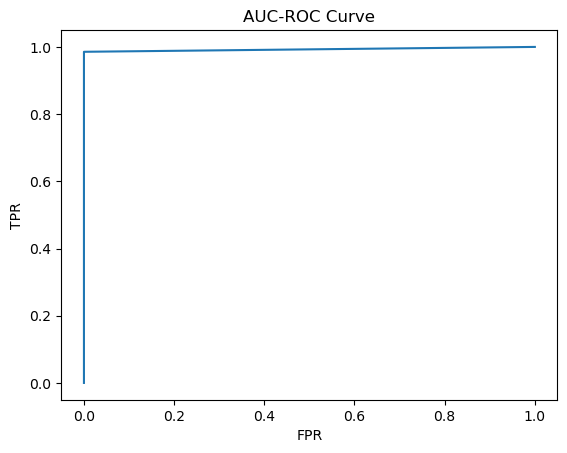

In [390]:
plt.title("AUC-ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr23,tpr23)

In [397]:
#df-3
l1=["log","dt","rf","nb","svc","knn","adaboost","xgboost"]
l2=[lg_acc3,dt_acc3,rf_acc3,nb_acc3,svc_acc3,knn_acc3,adbo_acc3,xgb_acc3]
l3=[fpr16,fpr17,fpr18,fpr19,fpr20,fpr21,fpr22,fpr23]
l4=[tpr16,tpr17,tpr18,tpr19,tpr20,tpr21,tpr22,tpr23]
l5=[f1score16,f1score17,f1score18,f1score19,f1score20,f1score21,f1score22,f1score23]

In [398]:
final2=pd.DataFrame({"Model_Name":l1,"accuracy":l2,"fpr":l3,"tpr":l4,"f1score":l5})
final2

,Model_Name,accuracy,fpr,tpr,f1score
0,log,73.529412,0.366667,0.815789,0.775000
1,dt,97.058824,0.050000,0.986842,0.974026
2,rf,97.794118,0.050000,1.000000,0.980645
3,nb,83.088235,0.383333,1.000000,0.868571
4,svc,66.176471,0.600000,0.868421,0.741573
5,knn,58.823529,0.550000,0.697368,0.654321
6,adaboost,97.058824,0.050000,0.986842,0.974026
7,xgboost,97.794118,0.050000,1.000000,0.980645
